In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = '../Data/RestaurantVisitors.csv'

df = pd.read_csv(PATH, index_col='date', parse_dates=True)

In [4]:
df.index.freq = 'D'

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df.dropna()

In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

for column in cols:
    df1[column] = df1[column].astype(int)

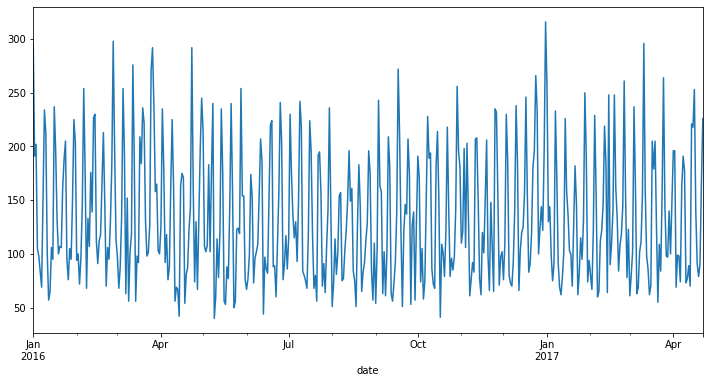

In [11]:
df1['total'].plot(figsize=(12,6))

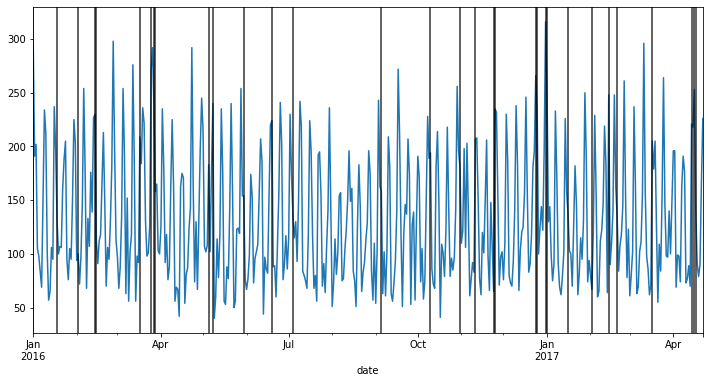

In [12]:
ax = df1['total'].plot(figsize=(12,6))

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
result = seasonal_decompose(df1['total'])

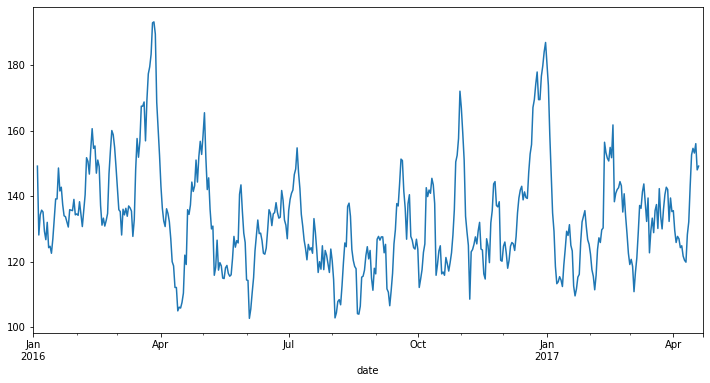

In [15]:
result.trend.plot(figsize=(12,6))

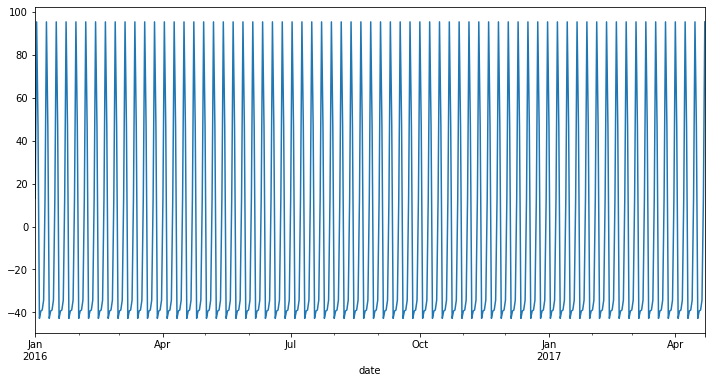

In [16]:
result.seasonal.plot(figsize=(12,6))

In [17]:
len(df1)

478

In [18]:
train = df1.iloc[:436]
test = df1.iloc[436:]

# SARIMA

In [19]:
from pmdarima import auto_arima

In [20]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likel

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Sun, 14 Jun 2020   AIC                           4845.442
Time:                                   04:06:53   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5657      4.363      4.714      0.000      12.014      29.117
ar.L1          0.1897      0.045      4.220      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.4032     86.679     16.468      0.000    1257.515    1597.292
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
# ValueError: non-invertible starting MA parameters found

model = SARIMAX(train['total'], order=(1,0,0), seasonal_order=(2,0,0,7), 
                enforce_invertibility=False)

In [23]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 14 Jun 2020   AIC                           4457.403
Time:                                   04:06:54   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
start = len(train)
end = len(train) + len(test) - 1


predictions = results.predict(start, end).rename('SARIMA Model')

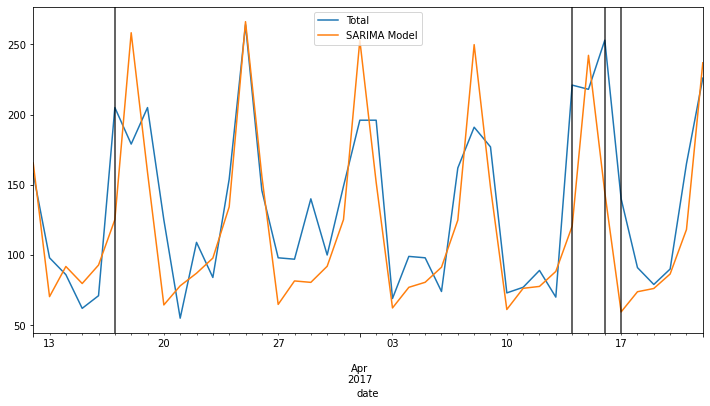

In [25]:
ax = test['total'].plot(legend=True, figsize=(12, 6), label='Total')
predictions.plot(legend=True)


for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8)

In [26]:
from statsmodels.tools.eval_measures import rmse

In [27]:
rmse(test['total'], predictions)

41.26315491179164

In [28]:
test['total'].mean()

134.26190476190476

# SARIMAX

In [29]:
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likel

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, [], 7)   Log Likelihood               -2348.662
Date:                            Sun, 14 Jun 2020   AIC                           4709.323
Time:                                    04:07:21   BIC                           4734.341
Sample:                                         0   HQIC                          4719.159
                                            - 478                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5555      4.274      2.704      0.007       3.180      19.931
x1            74.8356      4.545     16.464      0.000      65.927      83.744
ma.L1          0.1782      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5059      0.045     11.232      0.000       0.418       0.594
ar.S.L14       0.3843      0.043      8.982      0.000       0.300       0.468
sigma2      1142.0212     80.192     14.241      0.000     984.849    1299.194
===================================================================================
Ljung-Box (Q):                       85.07   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1,0,0), 
                seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)

In [31]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2158.482
Date:                           Sun, 14 Jun 2020   AIC                           4326.963
Time:                                   04:07:22   BIC                           4347.352
Sample:                               01-01-2016   HQIC                          4335.010
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.8878      4.241     15.773      0.000      58.576      75.199
ar.L1          0.2145      0.049      4.375      0.000       0.118       0.311
ar.S.L7        0.5147      0.042     12.312      0.000       0.433       0.597
ar.S.L14       0.4575      0.042     10.997      0.000       0.376       0.539
sigma2      1117.3920     73.301     15.244      0.000     973.725    1261.059
===================================================================================
Ljung-Box (Q):                      100.96   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               0.91   Skew:                             0.11
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start = len(train)
end = len(train) + len(test) - 1


predictions = results.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog Model')

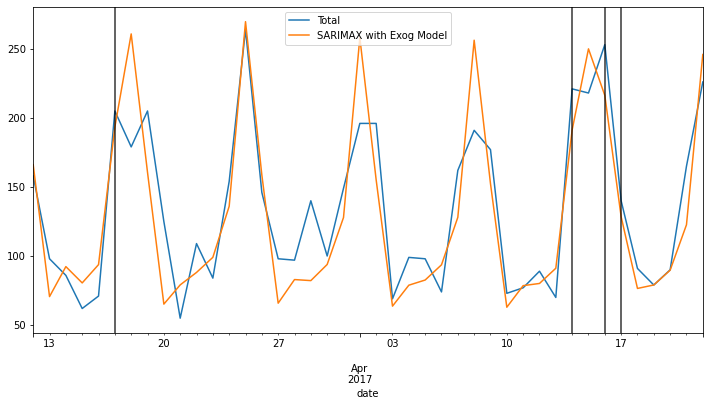

In [33]:
ax = test['total'].plot(legend=True, figsize=(12, 6), label='Total')
predictions.plot(legend=True)


for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8)

In [34]:
from statsmodels.tools.eval_measures import rmse

In [35]:
rmse(test['total'], predictions)

30.83299443786051

In [36]:
model = SARIMAX(df1['total'], exog=df1[['holiday']], order=(1,0,0), 
                seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)

In [37]:
results = model.fit()

In [38]:
exog_forecast = df[478:][['holiday']]

In [39]:
start = len(df1)
end = len(df1) + len(exog_forecast) - 1


forecast = results.predict(start, end, exog=exog_forecast).rename('SARIMAX with Exog Model Forecast')

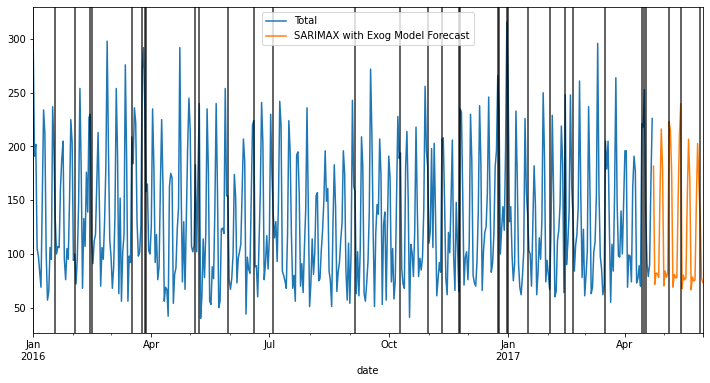

In [40]:
ax = df1['total'].plot(legend=True, figsize=(12, 6), label='Total')
forecast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8)

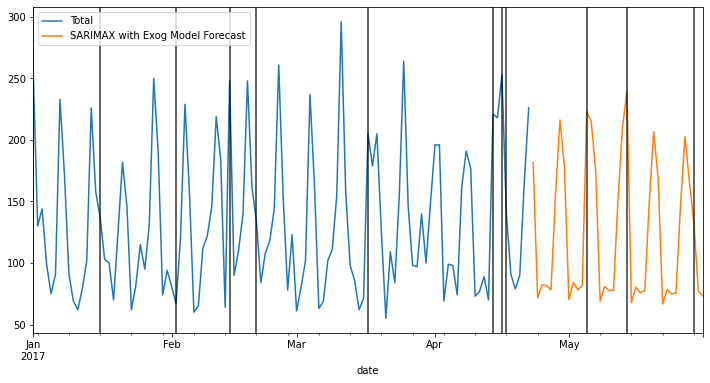

In [41]:
ax = df1['total'].loc['2017-01-01':].plot(legend=True, figsize=(12, 6), label='Total')
forecast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.8)